In [1]:
# 基本的なパッケージ
import numpy as np # 線形代数
import pandas as pd # データの加工, CSVファイルのI/O (e.g. pd.read_csv)
import random as rd # 乱数の生成
import datetime # manipulating date formats
# 可視化用
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# 時系列解析用
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# 設定
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\sales_train.csv"
                  )
item_cat=pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\item_categories.csv")
item=pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\items.csv")
sub=pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\sample_submission.csv")
shops=pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\shops.csv")
test=pd.read_csv(r"C:\Users\xuhan\Desktop\我的坚果云\Sys_learning\7_\competitive-data-science-predict-future-sales\test.csv")

In [2]:
# Separating the year from date column
import datetime
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date'], dayfirst=True).month

data['date'] = data['date'].apply(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y"))

In [3]:
ts = data.groupby(['date_block_num'])['item_cnt_day'].sum()

In [4]:
data['revenue'] = data['item_price'] * data['item_cnt_day']
month_revenue = data.groupby(['date_block_num'])['revenue'].sum()

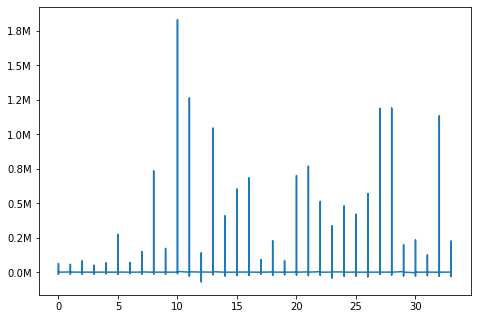

In [10]:
#只是画出图像，但是不知道这个图是怎么画的

fig = plt.figure()
ax = fig.add_axes([10,0,1,1])#分别为图像的左，底，宽，高
# ax.set_xticks(np.arange(2013, 2016, 1))

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
 
ax.plot(data['date_block_num'], data['revenue'])
plt.show()

In [13]:
total_revenue_per_month = data.groupby(['year', 'month'])['revenue'].sum().reset_index()
#total_revenue.apply(lambda x: '%.5f' % x, axis=1)
total_revenue_per_month.head(20)

,year,month,revenue
0,2013,1,9.194709e+07
1,2013,2,9.066571e+07
2,2013,3,1.049327e+08
3,2013,4,6.915429e+07
4,2013,5,6.506531e+07
5,2013,6,7.955041e+07
6,2013,7,6.935060e+07
7,2013,8,7.429797e+07
8,2013,9,1.190819e+08
9,2013,10,1.072416e+08


In [14]:
total_revenue_per_year = data.groupby(['year'])['revenue'].sum().reset_index()

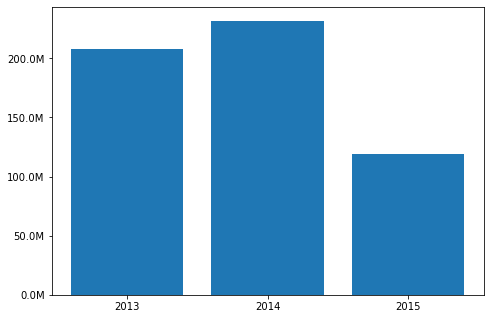

In [15]:
fig = plt.figure()
ax = fig.add_axes([10,0,1,1])
ax.set_xticks(np.arange(2013, 2016, 1))

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
 
ax.bar(total_revenue_per_month['year'],total_revenue_per_month['revenue'])
plt.show()

In [16]:
ax.set_xticks(np.arange(2013, 2016, 1))

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

ax.scatter(total_revenue_per_month['year'],total_revenue_per_month['revenue'])
ax.plot(total_revenue_per_month['year'],total_revenue_per_month['revenue'])
plt.show()

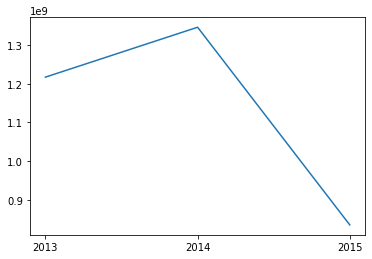

In [17]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

total_revenue_per_year['year'] = total_revenue_per_year['year'].astype(str)
plt.plot(total_revenue_per_year['year'], total_revenue_per_year['revenue'])

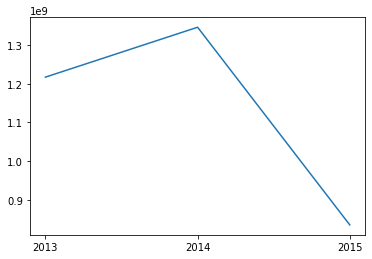

In [18]:
plt.locator_params(integer=True)
total_revenue_per_year['year'] = total_revenue_per_year['year'].astype(int)
plt.plot(total_revenue_per_year['year'], total_revenue_per_year['revenue'])

In [19]:
#ARIMA model Implementation
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data['revenue'], order = (4, 1, 0))
model.fit()
predictions = model.fit().predict()